# Introduction

**Hello! This quick guide will cover 6 important topics to get started Quant Trading:**

1.   How to get stock data
2.   How to clean your data
3.   How to plot price data
4.   How to backtest
5.   How to calculate your Sharpe ratio
6.   How to calculate your max drawdown

Feel free to only read the sections you need help with :D

# 1. How to get stock data

**I recommend getting your stock data from Yahoo Finance using the `yfinance` API if you are a beginner as it is free.**

To use it, first install it using pip. If you are using an IDE other than Google Colaboratory (eg. Anaconda or VS Code), you will need to run the below command on your terminal most likely.

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


We can now import it as follows.

In [ ]:
import yfinance as yf # Import yfinance and call it yf so that we can use this abbreviation in our code

Perfect, we are now ready to get data. You can read more about how to use this API by clicking [here](https://pypi.org/project/yfinance/). **Let's start by getting the data on just one stock.**

In [ ]:
aapl = yf.download("AAPL", start="2017-01-01", end="2019-01-01")
aapl.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.297699,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.267138,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.405804,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.711330,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.965155,134247600


Notice that some days are skipped (eg. 2017-01-07). This is because this was not a trading day (ie. weekend or public holiday). You do not need to worry about this.

You may also notice that there is a column showing "Adj Close" and one with "Close", so what's the difference? Adjusted close takes into account stock splits and dividends, which is important. Thus, you should use that (instead of Close data).

Although Open, High, Low, and Close are adjusted for stock splits, they are not adjusted for dividends. Thus, if your stock pays a dividend but you are testing your strategy on these prices, your profit will be understated by an amount equal to the dividend.

**To get intraday data do:**

In [ ]:
aapl_intra = yf.download("AAPL", interval = '5m', start="2022-02-01", end="2022-03-01")
aapl_intra.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-01 09:30:00-05:00,174.009995,174.589996,173.029999,173.600006,173.600006,6999150
2022-02-01 09:35:00-05:00,173.500000,173.750000,173.199997,173.279999,173.279999,2061454
2022-02-01 09:40:00-05:00,173.429993,173.550003,172.580002,172.589996,172.589996,2337835
2022-02-01 09:45:00-05:00,172.750000,172.990005,172.509995,172.701797,172.701797,1800858
2022-02-01 09:50:00-05:00,172.839996,173.074997,172.604996,172.630005,172.630005,1531362


Intraday 5m data is only available from the last 60 days on `yfinance` unfortunately. If you want even more granularity (eg. 1m data), there is even less days of data available. Thus, I recommend sticking to using daily data as it is more abundant.

**Now, say you wanted to get a specific column of data. How would you do that?**

In [ ]:
# Method 1.1 -- Specify the Column name
aapl.Open

Date
2017-01-03    28.950001
2017-01-04    28.962500
2017-01-05    28.980000
2017-01-06    29.195000
2017-01-09    29.487499
                ...    
2018-12-24    37.037498
2018-12-26    37.075001
2018-12-27    38.959999
2018-12-28    39.375000
2018-12-31    39.632500
Name: Open, Length: 502, dtype: float64

In [ ]:
# Method 1.2 -- Specify the Column name
aapl.loc[:,'Open']

Date
2017-01-03    28.950001
2017-01-04    28.962500
2017-01-05    28.980000
2017-01-06    29.195000
2017-01-09    29.487499
                ...    
2018-12-24    37.037498
2018-12-26    37.075001
2018-12-27    38.959999
2018-12-28    39.375000
2018-12-31    39.632500
Name: Open, Length: 502, dtype: float64

Method 1.2, although more to type, is more useful as you can also specify a row name like this:

In [ ]:
# Method 1.2 -- Specify the Column name (and row name)
aapl.loc['2017-01-03','Open']

28.950000762939453

In [ ]:
# Getting a range of data
aapl.loc['2017-01-03':'2017-01-08','Open']

## Notice that I put '2017-01-08' as the ending date, which is not in the table, yet pandas does not complain
## Pandas simply gives us the data up to the last trading day before '2017-01-08'

Date
2017-01-03    28.950001
2017-01-04    28.962500
2017-01-05    28.980000
2017-01-06    29.195000
Name: Open, dtype: float64

In [ ]:
# We can also do this
aapl.loc['2017-01-03':'2017-01-08','Open':'Low']

,Open,High,Low
Date,,,
2017-01-03,28.950001,29.082500,28.690001
2017-01-04,28.962500,29.127501,28.937500
2017-01-05,28.980000,29.215000,28.952499
2017-01-06,29.195000,29.540001,29.117500


If you look at the table above, you will see that the 'Date' label looks different from the labels of the different columns. Thus, we cannot access this column using the same technique as the rest.

In [ ]:
# Comment the code below out if you would like to see the error it throws
# aapl.Date

In [ ]:
# Instead do this
aapl.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [ ]:
# Want to get a specific date? Do this:
aapl.index[4]

Timestamp('2017-01-09 00:00:00')

We can also get data by specifying the row or column *number*. The first number in the square brackets is the row number. Second is the column number.

In [ ]:
# Method 2
# In coding, what you would think of as row 1 or column 1, the computer thinks of as row 0 or column 0
# This can be difficult to get used to but try not to forget!

aapl.iloc[0,0] # "First" row and column of data

28.950000762939453

You can read more about how to use `iloc` [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

**Now let's look at how to get data for two or more stocks at the same time.**

In [ ]:
data = yf.download("MSFT, AAPL", start="2017-01-01", end="2019-01-01")

[*********************100%***********************]  2 of 2 completed


In [ ]:
data

Adj Close                 Close                   High  \
                 AAPL       MSFT       AAPL        MSFT       AAPL   
Date                                                                 
2017-01-03  27.297691  58.065449  29.037500   62.580002  29.082500   
2017-01-04  27.267138  57.805649  29.004999   62.299999  29.127501   
2017-01-05  27.405804  57.805649  29.152500   62.299999  29.215000   
2017-01-06  27.711330  58.306702  29.477501   62.840000  29.540001   
2017-01-09  27.965151  58.121136  29.747499   62.639999  29.857500   
...               ...        ...        ...         ...        ...   
2018-12-24  35.589470  90.835312  36.707500   94.129997  37.887501   
2018-12-26  38.095741  97.040245  39.292500  100.559998  39.307499   
2018-12-27  37.848499  97.638550  39.037498  101.180000  39.192501   
2018-12-28  37.867893  96.876205  39.057499  100.389999  39.630001   
2018-12-31  38.233894  98.014893  39.435001  101.570000  39.840000   

                              Low                   Open              \
                  MSFT       AAPL        MSFT       AAPL        MSFT   
Date                                                                   
2017-01-03   62.840000  28.690001   62.130001  28.950001   62.790001   
2017-01-04   62.750000  28.937500   62.119999  28.962500   62.480000   
2017-01-05   62.660000  28.952499   62.029999  28.980000   62.189999   
2017-01-06   63.150002  29.117500   62.040001  29.195000   62.299999   
2017-01-09   63.080002  29.485001   62.540001  29.487499   62.759998   
...                ...        ...         ...        ...         ...   
2018-12-24   97.970001  36.647499   93.980003  37.037498   97.680000   
2018-12-26  100.690002  36.680000   93.959999  37.075001   95.139999   
2018-12-27  101.190002  37.517502   96.400002  38.959999   99.300003   
2018-12-28  102.410004  38.637501   99.519997  39.375000  102.089996   
2018-12-31  102.400002  39.119999  100.440002  39.632500  101.290001   

               Volume            
                 AAPL      MSFT  
Date                             
2017-01-03  115127600  20694100  
2017-01-04   84472400  21340000  
2017-01-05   88774400  24876000  
2017-01-06  127007600  19922900  
2017-01-09  134247600  20382700  
...               ...       ...  
2018-12-24  148676800  43935200  
2018-12-26  234330000  51634800  
2018-12-27  212468400  49498500  
2018-12-28  169165600  38196300  
2018-12-31  140014000  33173800  

[502 rows x 12 columns]

Let's say we wanted to access the 'Adj Close' column for AAPL. How would we do this? Well, our table now has *two* column headers so our approach is slightly different to before.

In [ ]:
# Method 1.1
data.loc[:,('Adj Close','AAPL')] # We put both headers now rather than only one

Date
2017-01-03    27.297691
2017-01-04    27.267138
2017-01-05    27.405804
2017-01-06    27.711330
2017-01-09    27.965151
                ...    
2018-12-24    35.589470
2018-12-26    38.095741
2018-12-27    37.848499
2018-12-28    37.867893
2018-12-31    38.233894
Name: (Adj Close, AAPL), Length: 502, dtype: float64

In [ ]:
# As before, we can get a specific data like this
data.loc['2018-12-24',('Adj Close','AAPL')]

35.58946990966797

In [ ]:
# And a range of dates like this
data.loc['2018-12-24':'2019-12-24',('Adj Close','AAPL')]

Date
2018-12-24    35.589470
2018-12-26    38.095741
2018-12-27    37.848499
2018-12-28    37.867893
2018-12-31    38.233894
Name: (Adj Close, AAPL), dtype: float64

In [ ]:
# Method 1.2
data.Close.AAPL

Date
2017-01-03    29.037500
2017-01-04    29.004999
2017-01-05    29.152500
2017-01-06    29.477501
2017-01-09    29.747499
                ...    
2018-12-24    36.707500
2018-12-26    39.292500
2018-12-27    39.037498
2018-12-28    39.057499
2018-12-31    39.435001
Name: AAPL, Length: 502, dtype: float64

Method 1.2 works when the name is nice. However, it does not work for 'Adj Close' due to the space. Observe:

In [ ]:
# Remove the hashtag below if you want to see the error it throws
# data.Adj Close.AAPL

We can again use iloc (method 2):

In [ ]:
data.iloc[0,0]

27.297691345214844

In [ ]:
data.iloc[0,1]

58.06544876098633

# 2. Cleaning your data

Cleaning data may sound weird. It essentially means preparing it so that you can run a strategy.

So what does it mean for data to be 'dirty'? Well, it means that data may be missing for certain days for example. This is more common than you think, especially for more obscure stocks.

**When data is missing, the cell value is just blank. This means that if you try and access the value in the cell using `loc` or `iloc` as in Part 1, it will return a `nan` value (which means the cell is blank).**

In [ ]:
# Let's see how many nan values there are in our AAPL data
aapl.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

It seems we were lucky and there are no NaN values in any of the columns. But what should you do if there are? **If you just code a backtest when there is missing data, your backtest will often result in an error.**

So, we need to **fill the empty cells**. There are multiple ways of doing this, but I will cover two simple but well-known ways: **forwardfill and backfill**. 

* Forwardfill: is when you use the value in the previous row (ie. row i-1) to fill the next one (ie. row i). 

* Backfill: uses row i+1 to fill row i. 

Important notes: 
* Forwardfill cannot fill the first row as there is no row before it. 
* Backfill cannot fill the last row as there is no row after it. 

Thus, I recommend using both methods just in case.

In [ ]:
# Forward fill the data first
aapl.ffill(inplace=True) 

# Setting inplace = True means that our actual aapl dataframe is written over
# Otherwise, it would return a new dataframe that you need to store like thisL

aapl = aapl.ffill()

In [ ]:
# We can now backfill just in case
aapl.bfill(inplace=True)

**Why did I choose to forward fill first?**

Well, as we go down the rows of our table you notice that time progresses more towards the present. Thus, it makes sense to fill a future timestamp with the value from a current timestamp. It does not make sense to fill a future timestamp with a timestamp even more in the future as you would never be able to do this in real-life; thus, you should not do this in your backtest either.

And that's it! We have now cleaned our data and are ready to backtest our strategy!

# 3. Plotting price data

In [ ]:
# Let's just import the typical packages + matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Line 4 is used to actually plot the chart. To start, let's first look at how to make a plot of the Adj Close prices.

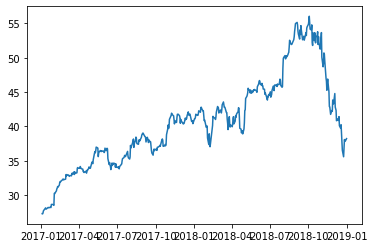

In [ ]:
plt.plot(aapl.loc[:,'Adj Close']) # Plotting only apple

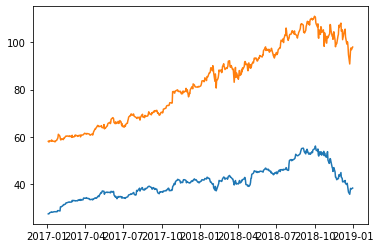

In [ ]:
plt.plot(data.loc[:,('Adj Close')]) # Plotting Apple and Microsoft on the same graph

Nice, but its missing some axes, a legend, and a title. It's also quite small... Let's fix that!

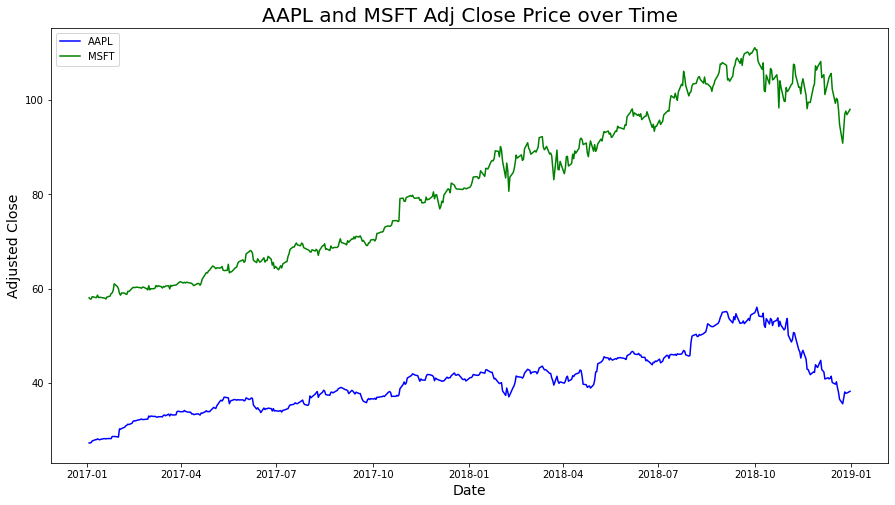

In [ ]:
# Change the size of our plot
plt.figure(figsize=(15, 8))

# Add title and axis names
plt.title('AAPL and MSFT Adj Close Price over Time',fontsize=20)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Adjusted Close',fontsize=14)

# Plotting the two seperate lines with their own labels
plt.plot(data.loc[:,('Adj Close','AAPL')], "-b", label="AAPL") # "-b" = blue color
plt.plot(data.loc[:,('Adj Close','MSFT')], "-g", label="MSFT") # "-g" = green color

# Plot the legend
plt.legend()

Nice! That looks pretty good! Now let's move on to the backtest.

# 4. How to backtest

Alright, the idea of a backtest is simple. You want to test how your strategy would perform on past data. Thus, the real challenge is coding your strategy and not really testing it. However, I leave the finding of the strategy to you but will simply show you how to test it :)

For this example, **let's assume we have a strategy that buys on the first day using our entire capital ($100,000). We then sell everything 21 trading days later. 7 trading days later, we buy as much as we can again and keep it for 21 trading days. We repeat this strategy perpetually.**

In [ ]:
import math

days = 0 # It is important to keep track of the number of days for our strategy
capital = 100000 # Our starting capital is 100,000. It is important to track this as time progresses so we can see our performance
shares_bought = 0 # To help us keep track if our last action was a buy or sell, and how many we bought
portfolio_value = np.array([])

# We will loop through each trading day in our test
for adj_close in aapl.loc[:,'Adj Close']:

  # Buy condition (buy every 7 days if we have not bought yet)
  if days % 7 == 0 and shares_bought == 0:

    # Check how many shares we can buy
    buy_price = adj_close # We are buying at the current price
    max_shares = capital / buy_price # Max shares we can buy
    shares_bought = math.floor(max_shares) # I assume fractional shares are not allowed and so I round down here

    # Remember to update the capital
    capital = (max_shares - shares_bought) * adj_close

    print(f'Bought {shares_bought} shares at a price of {buy_price} per share.')

  # Sell condition (sell 28 days after having bought)
  elif days % 28 == 0 and shares_bought > 0:

    # We need to sell the number of shares we bought
    sell_price = adj_close 
    shares_sold = shares_bought # Our strategy involves buying and sell everything
    value = sell_price * shares_sold

    # Remember to update the capital and shares bought
    capital += value
    shares_bought = 0

    print(f'Sold {shares_sold} shares at a price of {sell_price} per share.')
    print(f'The value of our portfolio is now ${round(capital)}.\n')

  # We also want to keep track of the Portfolio value at every timestamp
  ## We define Portfolio value = Capital + Value of stocks held
  portfolio = capital + ( shares_bought * adj_close )
  portfolio_value = np.append(portfolio_value,portfolio)

  # Increment the number of days as we have just looped through a row now
  days += 1

Bought 3663 shares at a price of 27.297698974609375 per share.
Sold 3663 shares at a price of 31.461767196655273 per share.
The value of our portfolio is now $115253.

Bought 3576 shares at a price of 32.22653579711914 per share.
Sold 3576 shares at a price of 33.196659088134766 per share.
The value of our portfolio is now $118722.

Bought 3474 shares at a price of 34.171512603759766 per share.
Sold 3474 shares at a price of 34.586936950683594 per share.
The value of our portfolio is now $120165.

Bought 3256 shares at a price of 36.90311813354492 per share.
Sold 3256 shares at a price of 34.40499496459961 per share.
The value of our portfolio is now $112031.

Bought 3231 shares at a price of 34.67044448852539 per share.
Sold 3231 shares at a price of 36.201560974121094 per share.
The value of our portfolio is now $116978.

Bought 3172 shares at a price of 36.872310638427734 per share.
Sold 3172 shares at a price of 39.03488540649414 per share.
The value of our portfolio is now $123838

The code above is longer than need be for such a simple strategy but I have tried to code it in a way you may need to code yours. **Let's look at our return.**

In [ ]:
# Let's take a look at our portfolio value for the first 5 trading days
portfolio_value[:5]

array([100000.        ,  99888.05341911, 100395.98753738, 101515.13196182,
       102444.890131  ])

In [ ]:
# Let's calculate our return from the first to the last day of our trading strategy
perc_return = ((portfolio_value[-1] / portfolio_value[0]) - 1) * 100
print(f'We made a return of {round(perc_return,2)}% by trading AAPL across {len(aapl.index)} trading days!')

We made a return of 6.39% by trading AAPL across 502 trading days!


**Let's take a look at how to plot our portfolio's performance over time.**

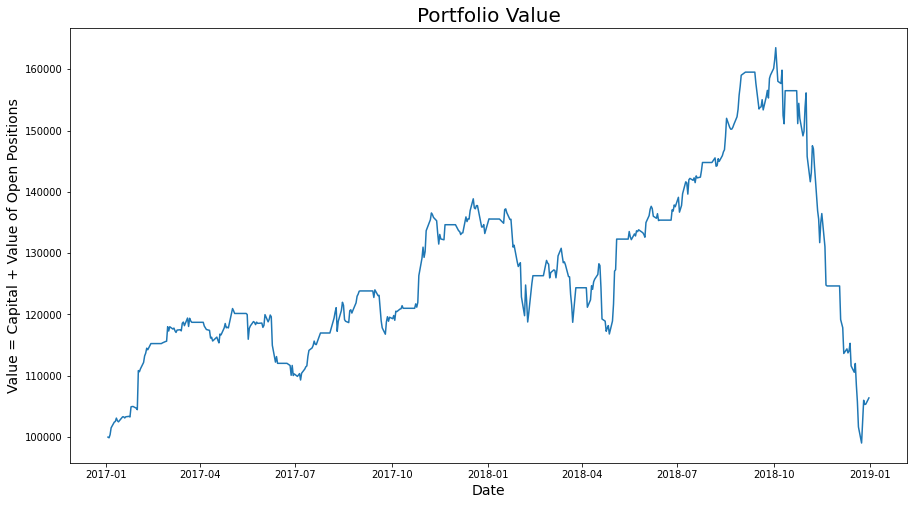

In [ ]:
# Change the size of our plot
plt.figure(figsize=(15, 8))

# Add title and axis names
plt.title('Portfolio Value',fontsize=20)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Value = Capital + Value of Open Positions',fontsize=14)

# Plotting the data (X = dates, Y = portfolio_value)
plt.plot(data.index, portfolio_value)

It seems our strategy started by performing very well (because Apple's share pricing was rising at that time) and then does bad when Apple falls. A better strategy would have a better buy signal to avoid trying to buy when the share price is expected to fall. Determining when it will fall however is the tricky part!

Anyways, **let's see how our strategy compares to simply buying and holding Apple** for the duration we are testing. In a buy and hold strategy, we buy as many shares as we can on the first day and then just hold that forever. 

In [ ]:
# Buy and hold
starting_capital = 100000 # USD
buy_price = aapl.loc[:,'Adj Close'][0] # Price on the first day

shares_bought = math.floor(starting_capital / buy_price)

Our portfolio value from buy and hold on a given day is then simply the shares bought (a constant) multiplied by the price of a share on that given day (variable). **Let's plot this!**

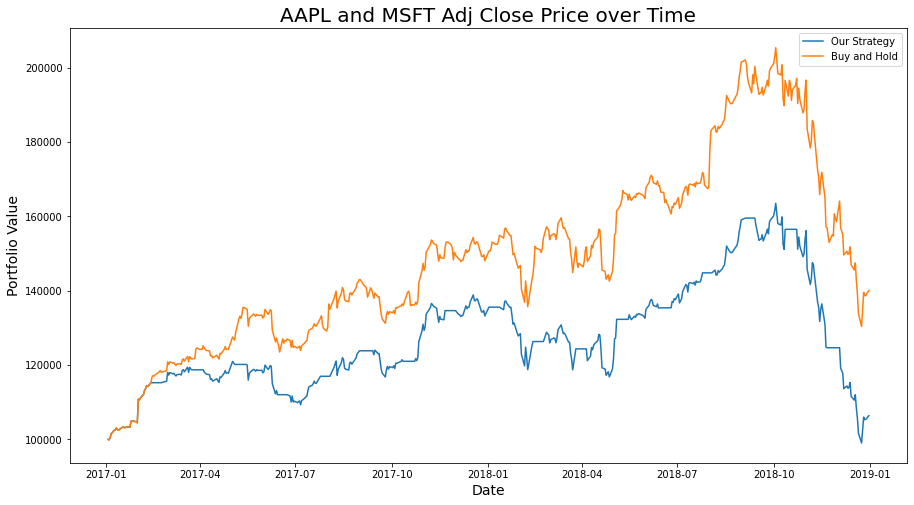

In [ ]:
# Change the size of our plot
plt.figure(figsize=(15, 8))

# Add title and axis names
plt.title('AAPL and MSFT Adj Close Price over Time',fontsize=20)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Portfolio Value',fontsize=14)

# Plotting the two seperate lines with their own labels
plt.plot(data.index, portfolio_value, label = 'Our Strategy')
plt.plot(data.index, shares_bought * aapl.loc[:,'Adj Close'].values, label = 'Buy and Hold')

# Plot the legend
plt.legend()

Unsurprisingly, our strategy does well when Apple does well and does bad when Apple does bad. However, it did not even beat a buy-and-hold strategy which is of course bad (and even worse when you take into account trading fees).

# 5. Calculating Sharpe Ratio

The Sharpe ratio is an important ratio in finance and trading as it measures *both* return and risk. It is the most well-known *risk-adjusted return* metric. You can read more about it [here](https://www.investopedia.com/terms/s/sharperatio.asp).

**The formula used to calculate the Sharpe ratio is:**

Sharpe ratio = (Mean portfolio return - Risk free rate) / (Standard deviation of portfolio returns)

For our purposes we will **assume the risk free rate is 0%. We must then annualize our Sharpe ratio. If using daily returns, do the following:**

Annualized sharpe ratio = Square root of 252 * Sharpe ratio

In [ ]:
# Finding our mean portfolio return

## First calculate the daily % return on our portfolio
pct_change = pd.Series(portfolio_value).pct_change(1) ### We transform our numpy array into a pandas series to be able to easily calculate % change
pct_change

0           NaN
1     -0.001119
2      0.005085
3      0.011147
4      0.009159
         ...   
497   -0.025868
498    0.070404
499   -0.006488
500    0.000512
501    0.009663
Length: 502, dtype: float64

In [ ]:
## Now calculate the mean return
daily_mean_return = pct_change.mean()
daily_mean_return

0.00021148020488885792

In [ ]:
# We now need the volatility (which is measured as standard deviation of the returns)
std = pct_change.std()
std

0.01324845379589748

We can now calculate the Sharpe ratio!

In [ ]:
sharpe = daily_mean_return / std
round(sharpe,3)

0.016

And the annualized Sharpe ratio.

In [ ]:
annualized_sharpe = (252 ** 0.5) * sharpe ## '**' is how you do exponents in Python
round(annualized_sharpe,3)

0.253

A Sharpe ratio value of 0.253 is very bad. Clearly our simple strategy could use some improvement!

**According to [Investopedia](https://www.investopedia.com/ask/answers/010815/what-good-sharpe-ratio.asp#:~:text=So%20what%20is%20considered%20a,or%20higher%20is%20considered%20excellent.):**
* Usually, any Sharpe ratio greater than 1.0 is considered acceptable to good by investors.
* A ratio higher than 2.0 is rated as very good.
* A ratio of 3.0 or higher is considered excellent.
* A ratio under 1.0 is considered sub-optimal.

If you are still confused on calculating the Sharpe ratio in Python, I recommend reading [this guide](https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805).

# 6. Calculating the Max Drawdown

The maximum drawdown (MDD) is the max % loss that you had on your portfolio between a peak and a subsequent trough. As an exercise, try to find where the maximum drawdown was on our plot in Part 4.

We can find our maximum drawdown as follows. Credit to [here](https://stackoverflow.com/questions/36750571/calculate-max-draw-down-with-a-vectorized-solution-in-python) for this wonderful code. 

In [ ]:
df_returns = pd.DataFrame(pd.Series(portfolio_value).pct_change(1)) # Create a dataframe with the daily percentage returns on our portfolio
cum_returns = (1 + df_returns).cumprod() # Cumulative return (done by multipling sucessive returns eg. 1.01 * 1.03 = a cumulative return of 1.0403)
drawdown =  1 - cum_returns.div(cum_returns.cummax()) # Invert the plot

We can look at our cumulative return over time. Its quite an interesting plot.

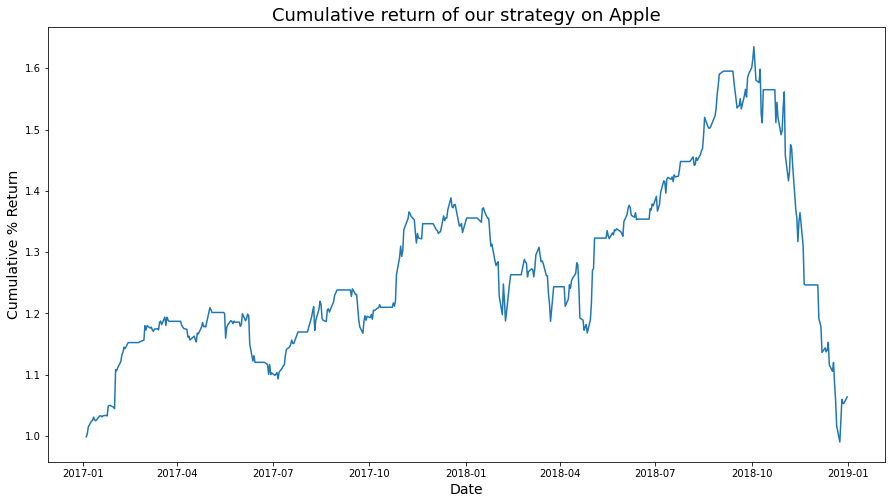

In [ ]:
# Change the size of our plot
plt.figure(figsize=(15, 8))

# Add title and axis names
plt.title('Cumulative return of our strategy on Apple',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Cumulative % Return',fontsize=14)

# Plotting the two seperate lines with their own labels
plt.plot(data.index, cum_returns.values)

**Nice, now lets look at our drawdown across tiem.**

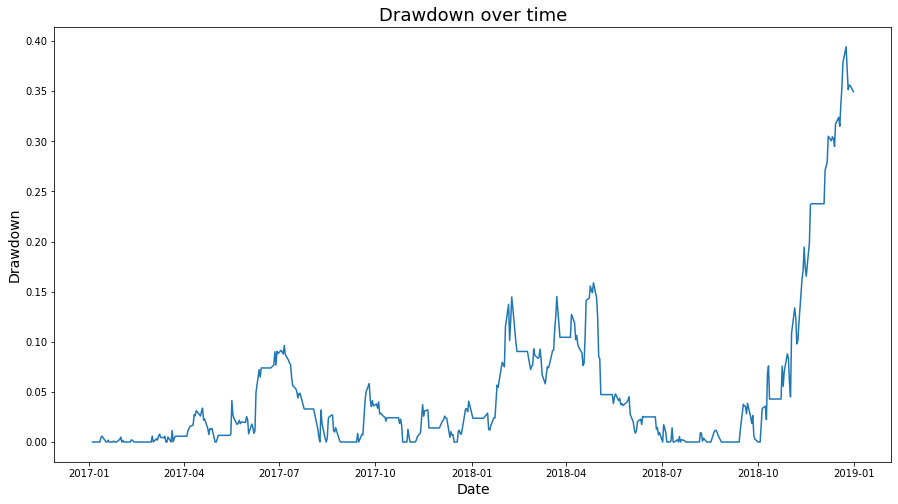

In [ ]:
# Change the size of our plot
plt.figure(figsize=(15, 8))

# Add title and axis names
plt.title('Drawdown over time',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Drawdown',fontsize=14)

# Plotting the two seperate lines with their own labels
plt.plot(data.index, drawdown.values)

It should be now fairly obvious where the *maximum* drawdown is. Hint: on the right-side of the plot.

**Let's calculate our MDD, which is a metric that will be checked in the competition.**

In [ ]:
MDD = drawdown.max()*100

print(f'The maximum drawdown (MDD) is approximately {int(round(MDD))}%.')

The maximum drawdown (MDD) is approximately 39%.


# Conclusion

And that's it! We're done! Hope you found this guide useful and best of luck testing your automated trading strategies!

If you want more guides like this follow me on my socials 😀

*   LinkedIn: https://www.linkedin.com/in/alex-pharaon/
*   Medium: https://medium.com/@alexpharaon02
*   GitHub: https://github.com/alexpharaon